In [ ]:
!pip install d2l

     |████████████████████████████████| 81kB 6.0MB/s 


# 4.2. Implementation of Multilayer Perceptrons from Scratch (Lesson)

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)


Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw




Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw




Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw




Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid poten

In [ ]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = nn.Parameter(
    torch.randn(num_inputs, num_hiddens, requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(
    torch.randn(num_hiddens, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

In [ ]:
# Activation function
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

# Model
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X @ W1 + b1)  # Here '@' stands for matrix multiplication
    return (H @ W2 + b2)

# Loss function
loss = nn.CrossEntropyLoss()

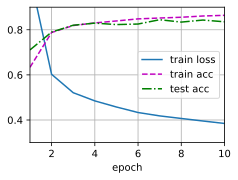

In [ ]:
# Training
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


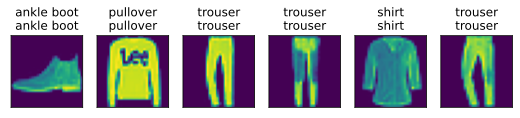

In [ ]:
# Evaluation
d2l.predict_ch3(net, test_iter)

# 4.3. Concise Implementation of Multilayer Perceptrons (Lesson)

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
net = nn.Sequential(nn.Flatten(), 
                    nn.Linear(784, 256), 
                    nn.ReLU(),
                    nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

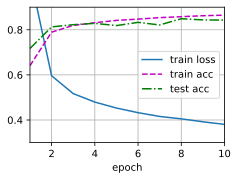

In [ ]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss()
trainer = torch.optim.SGD(net.parameters(), lr=lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

# 4.3. Concise Implementation of Multilayer Perceptrons (Exercise)

1. Adding another layer increase the risk of overfitting.
2. xavier_uniform seems to be a better initialization in this case.


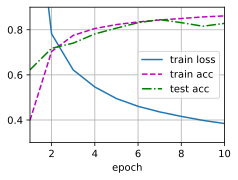

In [ ]:
net = nn.Sequential(nn.Flatten(), 
                    nn.Linear(784, 512), 
                    nn.ReLU(),
                    nn.Linear(512, 256), 
                    nn.ReLU(),
                    nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss()
trainer = torch.optim.SGD(net.parameters(), lr=lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

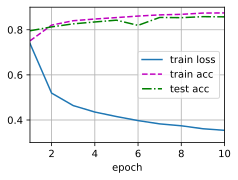

In [ ]:
net = nn.Sequential(nn.Flatten(), 
                    nn.Linear(784, 256), 
                    nn.ReLU(),
                    nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform(m.weight)

net.apply(init_weights);
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss()
trainer = torch.optim.SGD(net.parameters(), lr=lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

# 4.4. Model Selection, Underfitting, and Overfitting (Lesson)

In [ ]:
import math
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
max_degree = 20  # Maximum degree of the polynomial
n_train, n_test = 100, 100  # Training and test dataset sizes
true_w = np.zeros(max_degree)  # Allocate lots of empty space
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

features = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i + 1)  # `gamma(n)` = (n-1)!
# Shape of `labels`: (`n_train` + `n_test`,)
labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale=0.1, size=labels.shape)

In [ ]:
# Convert from NumPy ndarrays to tensors
true_w, features, poly_features, labels = [
    torch.tensor(x, dtype=torch.float32)
    for x in [true_w, features, poly_features, labels]]

features[:2], poly_features[:2, :], labels[:2]

(tensor([[ 0.2409],
         [-0.0652]]),
 tensor([[ 1.0000e+00,  2.4094e-01,  2.9026e-02,  2.3312e-03,  1.4042e-04,
           6.7666e-06,  2.7173e-07,  9.3529e-09,  2.8169e-10,  7.5411e-12,
           1.8170e-13,  3.9798e-15,  7.9908e-17,  1.4810e-18,  2.5488e-20,
           4.0941e-22,  6.1653e-24,  8.7381e-26,  1.1696e-27,  1.4832e-29],
         [ 1.0000e+00, -6.5191e-02,  2.1250e-03, -4.6176e-05,  7.5257e-07,
          -9.8122e-09,  1.0661e-10, -9.9288e-13,  8.0909e-15, -5.8606e-17,
           3.8206e-19, -2.2643e-21,  1.2301e-23, -6.1686e-26,  2.8724e-28,
          -1.2484e-30,  5.0865e-33, -1.9506e-35,  7.0644e-38, -2.4239e-40]]),
 tensor([5.1884, 5.0553]))

In [ ]:
def evaluate_loss(net, data_iter, loss):  
    """Evaluate the loss of a model on the given dataset."""
    metric = d2l.Accumulator(2)  # Sum of losses, no. of examples
    for X, y in data_iter:
        out = net(X)
        y = y.reshape(out.shape)
        l = loss(out, y)
        metric.add(l.sum(), l.numel())
    return metric[0] / metric[1]

def train(train_features, test_features, train_labels, test_labels,
          num_epochs=400, animate=True):
    loss = nn.MSELoss()
    input_shape = train_features.shape[-1]
    # Switch off the bias since we already catered for it in the polynomial
    # features
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels.reshape(-1, 1)),
                                batch_size)
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1, 1)),
                               batch_size, is_train=False)
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)
    if animate:
      animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                            legend=['train', 'test'])
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        if animate == True and (epoch == 0 or (epoch + 1) % 20 == 0):
            animator.add(epoch + 1, (evaluate_loss(
                net, train_iter, loss), evaluate_loss(net, test_iter, loss)))
    print('weight:', net[0].weight.data.numpy())

    return evaluate_loss(net, test_iter, loss)

weight: [[ 5.005891   1.1896038 -3.3885727  5.6162906]]


0.009812871646136045

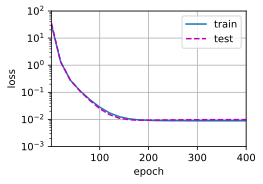

In [ ]:
# Third-Order Polynomial Function Fitting (Normal)
# Pick the first four dimensions, i.e., 1, x, x^2/2!, x^3/3! from the
# polynomial features
train(poly_features[:n_train, :4], poly_features[n_train:, :4],
      labels[:n_train], labels[n_train:])

weight: [[3.2527764 3.8899212]]


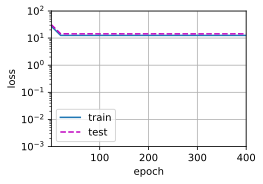

In [ ]:
# 4.4.4.4. Linear Function Fitting (Underfitting)
# Pick the first two dimensions, i.e., 1, x, from the polynomial features
train(poly_features[:n_train, :2], poly_features[n_train:, :2],
      labels[:n_train], labels[n_train:])

weight: [[ 5.0156384   1.2425343  -3.438104    5.3221283   0.12306626  0.87208354
   0.26979807 -0.03289155 -0.15832034 -0.0309513   0.0161109   0.06338204
  -0.15795691 -0.11906281 -0.05541702  0.04485308  0.13637109  0.15160476
  -0.11057559 -0.03197964]]


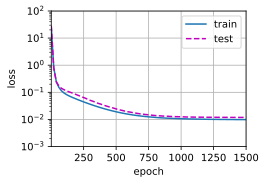

In [ ]:
# 4.4.4.5. Higher-Order Polynomial Function Fitting (Overfitting)
# Pick all the dimensions from the polynomial features
train(poly_features[:n_train, :], poly_features[n_train:, :],
      labels[:n_train], labels[n_train:], num_epochs=1500)

# 4.4. Model Selection, Underfitting, and Overfitting (Exercise)

In [ ]:
loss_history = []
for order in range(1, 101):
  loss = train(poly_features[:n_train, :4], poly_features[n_train:, :4],
      labels[:n_train], labels[n_train:], animate=False)
  loss_history.append(loss)

weight: [[ 5.005937   1.1893004 -3.3886156  5.6159296]]
weight: [[ 5.0066595  1.1897942 -3.3880942  5.6162486]]
weight: [[ 5.006449   1.1896569 -3.3880575  5.616113 ]]
weight: [[ 5.006529   1.189547  -3.3882477  5.616015 ]]
weight: [[ 5.006416   1.1895291 -3.3884416  5.616074 ]]
weight: [[ 5.0059614  1.189714  -3.388632   5.616298 ]]
weight: [[ 5.006507   1.1893872 -3.3882165  5.6159253]]
weight: [[ 5.005994   1.1896825 -3.3887928  5.6162157]]
weight: [[ 5.006352   1.1899722 -3.3883355  5.6162953]]
weight: [[ 5.0063133  1.189743  -3.388307   5.61634  ]]
weight: [[ 5.006403   1.1898079 -3.3883152  5.616261 ]]
weight: [[ 5.0065536  1.189488  -3.388114   5.6161103]]
weight: [[ 5.006121   1.1895838 -3.3887677  5.6162925]]
weight: [[ 5.0058928  1.1895087 -3.3884993  5.6162124]]
weight: [[ 5.006078   1.1894498 -3.3883781  5.6160717]]
weight: [[ 5.006314   1.1893142 -3.3883624  5.6159296]]
weight: [[ 5.006324   1.1895118 -3.3884656  5.6160064]]
weight: [[ 5.0065594  1.1895624 -3.388126   5.61

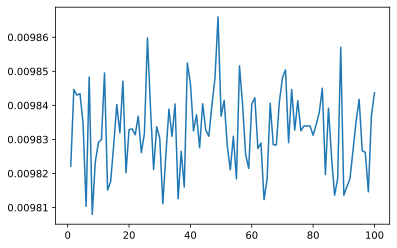

In [ ]:
import seaborn as sns
sns.lineplot(y=loss_history, x=np.arange(1, 101))

# 4.5. Weight Decay (Lesson)

In [ ]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

In [ ]:
def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            # The L2 norm penalty term has been added, and broadcasting
            # makes `l2_penalty(w)` a vector whose length is `batch_size`
            l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('L2 norm of w:', torch.norm(w).item())

L2 norm of w: 13.505859375


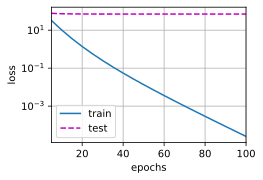

In [ ]:
train(lambd=0)

L2 norm of w: 0.35662952065467834


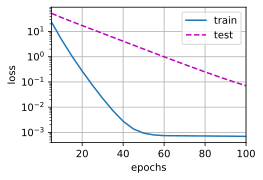

In [ ]:
train(lambd=3)

In [ ]:
def train_concise(wd, animate=True):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss()
    num_epochs, lr = 100, 0.003
    # The bias parameter has not decayed
    trainer = torch.optim.SGD([{
        "params": net[0].weight,
        'weight_decay': wd}, {
            "params": net[0].bias}], lr=lr)
    if animate == True:
      animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.backward()
            trainer.step()
        if (epoch + 1) % 5 == 0 and animate == True:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('L2 norm of w:', net[0].weight.norm().item())

    return d2l.evaluate_loss(net, test_iter, loss)

L2 norm of w: 12.889126777648926


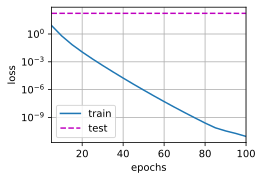

In [ ]:
|train_concise(0)

L2 norm of w: 0.4201357364654541


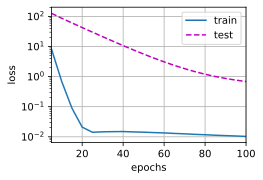

In [ ]:
train_concise(3)

# 4.5. Weight Decay (Exercise)

In [ ]:
loss_history = []
for wd in np.arange(0, 501)/50:
  loss = train_concise(wd, animate=False)
  loss_history.append(loss)

L2 norm of w: 13.16742992401123
L2 norm of w: 13.249204635620117
L2 norm of w: 13.666319847106934
L2 norm of w: 12.002365112304688
L2 norm of w: 12.215434074401855
L2 norm of w: 12.837108612060547
L2 norm of w: 11.25132942199707
L2 norm of w: 12.210638999938965
L2 norm of w: 11.4972505569458
L2 norm of w: 10.88135814666748
L2 norm of w: 10.348288536071777
L2 norm of w: 9.66079044342041
L2 norm of w: 9.697700500488281
L2 norm of w: 10.771689414978027
L2 norm of w: 9.841485023498535
L2 norm of w: 9.46144962310791
L2 norm of w: 9.35701847076416
L2 norm of w: 8.954974174499512
L2 norm of w: 8.813801765441895
L2 norm of w: 8.230547904968262
L2 norm of w: 8.134499549865723
L2 norm of w: 7.854874610900879
L2 norm of w: 7.9206438064575195
L2 norm of w: 7.514441967010498
L2 norm of w: 7.356082916259766
L2 norm of w: 7.252229690551758
L2 norm of w: 7.0207743644714355
L2 norm of w: 7.2671122550964355
L2 norm of w: 6.0555830001831055
L2 norm of w: 5.9668073654174805
L2 norm of w: 6.429480075836182

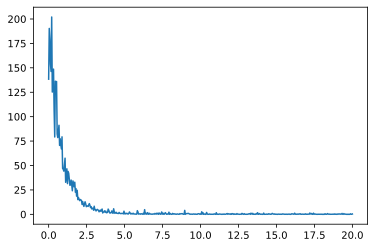

In [ ]:
import seaborn as sns
sns.lineplot(y=loss_history, x=np.arange(0, 501)/25)

# 4.6. Dropout

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1
    # In this case, all elements are dropped out
    if dropout == 1:
        return torch.zeros_like(X)
    # In this case, all elements are kept
    if dropout == 0:
        return X
    mask = (torch.rand(X.shape) > dropout).float()
    return mask * X / (1.0 - dropout)

In [ ]:
X = torch.arange(16, dtype=torch.float32).reshape((2, 8))
print(X)
print(dropout_layer(X, 0.))
print(dropout_layer(X, 0.5))
print(dropout_layer(X, 1.))

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  2.,  0.,  6.,  0., 10., 12., 14.],
        [ 0.,  0., 20., 22., 24., 26.,  0., 30.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])


In [ ]:
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256
dropout1, dropout2 = 0.2, 0.5

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs, num_hiddens1, num_hiddens2,
                 is_training=True):
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.training = is_training
        self.lin1 = nn.Linear(num_inputs, num_hiddens1)
        self.lin2 = nn.Linear(num_hiddens1, num_hiddens2)
        self.lin3 = nn.Linear(num_hiddens2, num_outputs)
        self.relu = nn.ReLU()

    def forward(self, X):
        H1 = self.relu(self.lin1(X.reshape((-1, self.num_inputs))))
        # Use dropout only when training the model
        if self.training == True:
            # Add a dropout layer after the first fully connected layer
            H1 = dropout_layer(H1, dropout1)
        H2 = self.relu(self.lin2(H1))
        if self.training == True:
            # Add a dropout layer after the second fully connected layer
            H2 = dropout_layer(H2, dropout2)
        out = self.lin3(H2)
        return out

net = Net(num_inputs, num_outputs, num_hiddens1, num_hiddens2)

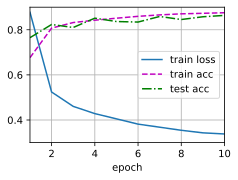

In [ ]:
num_epochs, lr, batch_size = 10, 0.5, 256
loss = nn.CrossEntropyLoss()
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

In [ ]:
net = nn.Sequential(
    nn.Flatten(), nn.Linear(784, 256), nn.ReLU(),
    # Add a dropout layer after the first fully connected layer
    nn.Dropout(dropout1), nn.Linear(256, 256), nn.ReLU(),
    # Add a dropout layer after the second fully connected layer
    nn.Dropout(dropout2), nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

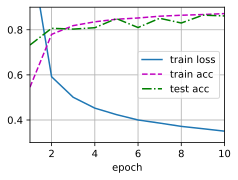

In [ ]:
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)